In [1]:
# Import the required libraries

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Grab the data from yahoo finance API
name = (input("Enter ticker of your choice")).upper()
data = yf.download(name, start="2022-01-01", end="2023-12-31")

# compute returns using the adjusted close price and the built in pct_change function
returns = data["Adj Close"].pct_change()

Enter ticker of your choice msft


[*********************100%***********************]  1 of 1 completed


In [8]:
# Create a function for the Omega ratio

# Annualize the return threshold.
# Subtract the threshold from the returns.
# Add up the positive returns less the threshold and negative returns less the threshold.

# The Omega ratio is the sum of positive returns less the threshold 
# divided by the sum of negative returns less the threshold.

def omega_ratio(returns, required_return=0.0):
    """Determines the Omega ratio of a strategy.
    
    Parameters
    ----------
    returns : pd.Series or np.ndarray
        Daily returns of the strategy, noncumulative.
    required_return : float, optional
        Minimum acceptance return of the investor. Threshold over which to
        consider positive vs negative returns. It will be converted to a
        value appropriate for the period of the returns. E.g. An annual minimum
        acceptable return of 100 will translate to a minimum acceptable
        return of 0.018.

    Returns
    -------
    omega_ratio : float

    Note
    -----
    See <https://en.wikipedia.org/wiki/Omega_ratio> for more details.
    """
    
    return_threshold = (1 + required_return) ** (1 / 252) - 1
    
    returns_less_thresh = returns - return_threshold
    
    numer = sum(returns_less_thresh[returns_less_thresh > 0.0])
    denom = -1.0 * sum(returns_less_thresh[returns_less_thresh < 0.0])
    
    if denom > 0.0:
        return numer / denom
    else:
        return np.nan

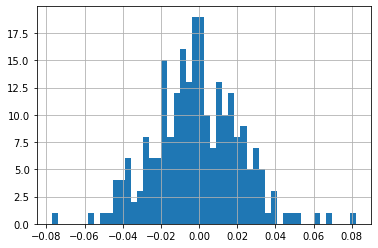

In [4]:
# create a distribution of returns
returns.hist(bins=50);

# Save the figure.
plt.savefig(f"./Images/{name}OmegaRatio.jpg")

In [5]:
# check the skew and kurtosis.

print("Skew Returns")
display(returns.skew())

print()

print("Kurtosis Returns")
display(returns.kurtosis())

Skew Returns


0.13919640225780566


Kurtosis Returns


0.8457999115445545

In [6]:
# compute the Omega ratio.
# use a threshold of 7% which is the historical average annual return of the stock market

print("Omega Ratio")
omega_ratio(returns, 0.07)

Omega Ratio


0.8633749196632688

In [7]:
print(f"The Omega ratio is {round(omega_ratio(returns, 0.07), 2)}. Taking into consideration skew and kurtosis, \n{name}’s gains outperformed the losses by a factor of {round(omega_ratio(returns, 0.07), 2)}")

The Omega ratio is 0.86. Taking into consideration skew and kurtosis, 
MSFT’s gains outperformed the losses by a factor of 0.86
